# Optimisation coursework

TODO:
- perform function approximation
    - implement BGD
    - implrmrnt Adadelta
    - perform hyperparametrs tuning

Function to approximate: $F(\theta, x): \theta_1 + \theta_2x + \theta_3x^2$

Loss function: $Q(\theta) = \frac{1}{l} \sum_{i=1}^{l}\left [ f(\theta, x_i) - y_i\right]^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def foo(coefs, x):
    return coefs[0] + coefs[1]*x + coefs[2]*x**2

In [4]:
def loss(coefs, x, y):
    return np.sum((foo(coefs, x) - y)**2)

In [5]:
def grad_loss(theta, x, y):
    xs = np.column_stack([np.ones(x.shape[0]), x, x**2])
    return np.dot(2*(np.dot(xs, theta) - y), xs)

In [52]:
def BGD(theta, lr=.0002, steps=2000, tol=1e-4):
    loss_history = [float('inf'), loss(theta, x, y), ]
    for step in range(steps):
        theta -= lr * grad_loss(theta, x, y)
        loss_history.append(loss(theta, x, y))
        
        if abs(loss_history[step-1] - loss_history[step]) < tol:
            print(f'Tolerance exceeded on step #{step}, theta --> {np.round(theta, 3)}')
            del loss_history[0]
            break
    print(f'Steps exceeded on step #{step}, theta --> {np.round(theta, 3)}')
    return theta, loss_history

In [53]:
def RMS(vector, e):
    return np.array([(x + e)**0.5 for x in vector])

In [57]:
def adadelta(theta, max_iterations=2000, gamma=0.9, 
                tol=1e-4, e=1e-7):
    loss_history = [float('inf'), loss(theta, x, y)]
    dim = len(theta)
    E_g = np.zeros(dim)
    E_x = np.zeros(dim)
    for count in range(max_iterations):
        g = grad_loss(theta, x, y)
        E_g = (gamma * E_g) + ((1 - gamma) * g**2)
        RMS_E_x = RMS(E_x, e)
        RMS_E_g = RMS(E_g, e)
        delta_x = (RMS_E_x / RMS_E_g) * g
        E_x = (gamma * E_x) + ((1 - gamma) * delta_x**2)
        theta -= delta_x        
        loss_history.append(loss(theta, x, y))
        if abs(loss_history[count-1] - loss_history[count]) < tol:
            print(f'Tolerance exceeded on step #{count}, theta --> {np.round(theta, 3)}')
            del loss_history[0]
            break
    print(f'Steps exceeded on step #{count}, theta --> {np.round(theta, 3)}')
    return theta, loss_history

In [9]:
THETA = [3, 2, 1]
l = 10

In [10]:
x = np.linspace(-7, 4, l)
y = foo(THETA, x) 

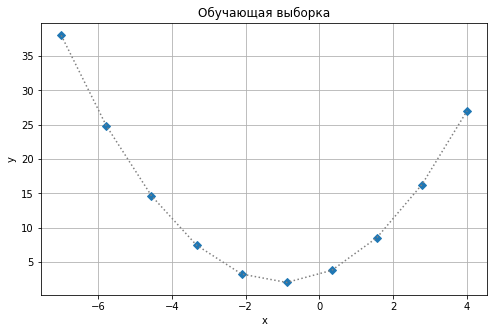

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, y, 'D')
ax.plot(x, y, linestyle=':', color='gray')
ax.set(xlabel='x', ylabel='y', title='Обучающая выборка')
plt.grid()
# plt.savefig('train.png', dpi=300)

In [85]:
test_ = np.zeros(3)
test_1 = list(map(int, np.random.randint(-5, 5, 3)))
run_state = [2.5, 1.3, .4]

In [90]:
coef_est_BGD, history_BGD = BGD(run_state)

Tolerance exceeded on step #907, theta --> [2.928 2.005 1.003]
Steps exceeded on step #907, theta --> [2.928 2.005 1.003]


In [92]:
coef_est_Ada, history_Ada = adadelta(run_state)

Tolerance exceeded on step #920, theta --> [3.027 1.991 0.995]
Steps exceeded on step #920, theta --> [3.027 1.991 0.995]


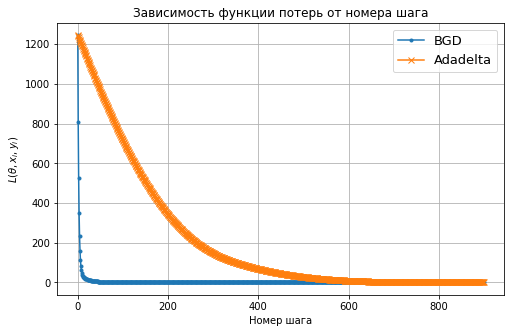

In [94]:
window = 900
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(range(window), history_BGD[:window], '.-', label='BGD')
ax.plot(range(window), history_Ada[:window], 'x-', label='Adadelta')
ax.set(xlabel='Номер шага', 
       ylabel=r'$L(\theta, x_i, y_i)$', 
       title='Зависимость функции потерь от номера шага')
plt.legend(loc='best', prop={'size': 13})
plt.grid()
# plt.savefig('loss_history.png', dpi=300)

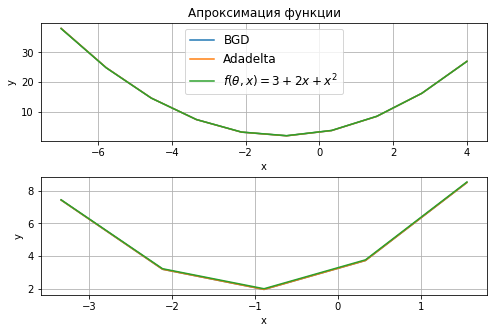

In [89]:
window = x[(x > -4) & (x < 2)]
fig, ax = plt.subplots(2, figsize=(8, 5))
ax[0].plot(x, f(coef_est_BGD, x), label='BGD')
ax[0].plot(x, f(coef_est_Ada, x), label='Adadelta')
ax[0].plot(x, y, label=r'$f(\theta, x) = 3 + 2x + x^2$')
ax[0].set(xlabel='x', ylabel='y', title='Апроксимация функции')
ax[0].legend(loc=9, prop={'size': 12})
ax[0].grid()

ax[1].plot(window, f(coef_est_BGD, window))
ax[1].plot(window, f(coef_est_Ada, window))
ax[1].plot(window, f(THETA, window))
ax[1].set(xlabel='x', ylabel='y')
ax[1].grid()

plt.subplots_adjust(hspace=.3)
# plt.savefig('aproximation_compariscon.png', dpi=300)

In [95]:
run_state = [2.5, 1.3, .4]
lrs = np.linspace(.0001, .0002, 5)

bgd_lrs = []

for lr_ in lrs:
    bgd_lrs.append(BGD(run_state, lr_)[1]) # loss history for diferent lr

Tolerance exceeded on step #1456, theta --> [2.898 2.007 1.004]
Steps exceeded on step #1456, theta --> [2.898 2.007 1.004]
Tolerance exceeded on step #1257, theta --> [2.909 2.007 1.004]
Steps exceeded on step #1257, theta --> [2.909 2.007 1.004]
Tolerance exceeded on step #1110, theta --> [2.917 2.006 1.004]
Steps exceeded on step #1110, theta --> [2.917 2.006 1.004]
Tolerance exceeded on step #997, theta --> [2.923 2.006 1.003]
Steps exceeded on step #997, theta --> [2.923 2.006 1.003]
Tolerance exceeded on step #907, theta --> [2.928 2.005 1.003]
Steps exceeded on step #907, theta --> [2.928 2.005 1.003]


array([0.0001  , 0.000125, 0.00015 , 0.000175, 0.0002  ])

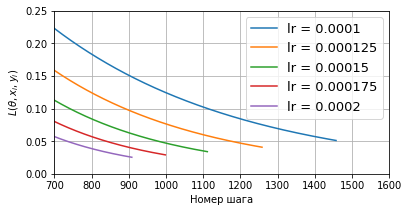

In [111]:
window = 1600
fig, ax = plt.subplots(figsize=(6, 3))
for ind, _ in enumerate(bgd_lrs):
    ax.plot(range(len(_)), _, label=f'lr = {round(lrs[ind], 6)}')

ax.set(xlabel='Номер шага', 
       ylabel=r'$L(\theta, x_i, y_i)$'), 
#        title='Зависимость функции потерь от номера шага для разных lr')
plt.legend(loc='best', prop={'size': 13})
ax.set_xlim(700, window)
ax.set_ylim(0, .25)
plt.grid()
plt.savefig('various_lr_TAILS_BGD.png', dpi=300)

In [128]:
run_state = [2.5, 1.3, .4]
gammas = np.linspace(.5, .9, 8)
es = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]

ada_gms = []
ada_es = []

for g in gammas:
    print(g)
    ada_gms.append(adadelta(run_state, gamma=g)[1])
print('es -------->')
for e in es:
    print(e)
    ada_es.append(adadelta(run_state, e=e, gamma=.5, max_iterations=3000)[1])

0.5
Tolerance exceeded on step #565, theta --> [3.022 1.995 0.998]
Steps exceeded on step #565, theta --> [3.022 1.995 0.998]
0.5571428571428572
Tolerance exceeded on step #583, theta --> [3.025 1.994 0.998]
Steps exceeded on step #583, theta --> [3.025 1.994 0.998]
0.6142857142857143
Tolerance exceeded on step #604, theta --> [3.031 1.992 0.997]
Steps exceeded on step #604, theta --> [3.031 1.992 0.997]
0.6714285714285715
Tolerance exceeded on step #632, theta --> [3.037 1.991 0.997]
Steps exceeded on step #632, theta --> [3.037 1.991 0.997]
0.7285714285714286
Tolerance exceeded on step #676, theta --> [3.046 1.991 0.996]
Steps exceeded on step #676, theta --> [3.046 1.991 0.996]
0.7857142857142858
Tolerance exceeded on step #735, theta --> [3.05  1.992 0.995]
Steps exceeded on step #735, theta --> [3.05  1.992 0.995]
0.8428571428571429
Tolerance exceeded on step #805, theta --> [3.041 1.992 0.995]
Steps exceeded on step #805, theta --> [3.041 1.992 0.995]
0.9
Tolerance exceeded on st

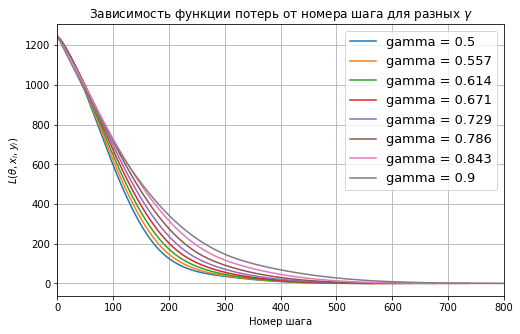

In [124]:
window = (0, 800)
fig, ax = plt.subplots(figsize=(8, 5))
for ind, _ in enumerate(ada_gms):
    ax.plot(range(len(_)), _, label=f'gamma = {round(gammas[ind], 3)}')

ax.set(xlabel='Номер шага', 
       ylabel=r'$L(\theta, x_i, y_i)$', 
       title=r'Зависимость функции потерь от номера шага для разных $\gamma$')
plt.legend(loc='best', prop={'size': 13})
ax.set_xlim(window)
plt.grid()
# plt.savefig('various_gammas_ada.png', dpi=300)

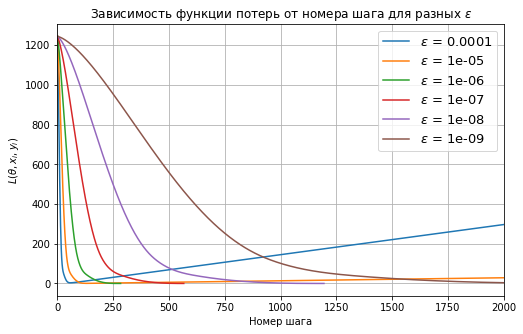

In [127]:
window = (0, 2000)
fig, ax = plt.subplots(figsize=(8, 5))
for ind, _ in enumerate(ada_es):
    ax.plot(range(len(_)), _,label=rf'$\varepsilon$ = {es[ind]}')

ax.set(xlabel='Номер шага', 
       ylabel=r'$L(\theta, x_i, y_i)$', 
       title=r'Зависимость функции потерь от номера шага для разных $\varepsilon$')
plt.legend(loc='best', prop={'size': 13})
ax.set_xlim(window)
plt.grid()
# plt.savefig('various_epsilon_ada.png', dpi=300)